In [351]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

The ojective of this analysis is to determine which studios are most successful along the lines of total gross revenue, profitability, and growth in profitability over time. Each of these components is a different way to measure success and will likely highlight the different ways that studios can find success in the industry. 

To do this analysis, we first pull in our merged data set containing values from the TMDB database, the IMDb database, The Numbers databse, and the Box Office Mojo database. We'll clean it up slightly before moving on to the analysis.

In [653]:
df = pd.read_csv('Cleaned Data/final_merged.csv')
print(df.shape)
df.head()

(2210, 15)


,Unnamed: 0,year,imdb_rating,imdb_numvotes,tmdb_id,imdb_id,title,genre,studio,tmdb_rating,tmdb_num_votes,production_budget,domestic_gross,total_gross,profitability
0,0,2010,8.3,65304,44639.0,tt1645089,Inside Job,['Documentary'],['Sony Pictures'],7.7,586.0,2000000,4311834.0,7799257.0,3.899629
1,1,2010,6.4,971,59015.0,tt1646127,Lights Out,"['Drama', 'Mystery', 'Thriller']","['Diaphana Films', 'Région Ile-de-France', 'CN...",6.2,32.0,5000000,67268835.0,148806510.0,29.761302
2,2,2010,6.4,12,510578.0,tt1627937,The Journey,['Family'],"['QOA Entertainment', 'DesertRock Entertainment']",0.0,0.0,500000,19800.0,19800.0,0.039600
3,3,2010,5.5,22,313806.0,tt1636456,The Intern,['Drama'],[],0.0,0.0,40000000,75764672.0,197115710.0,4.927893
4,4,2010,6.2,843,64138.0,tt1636833,Black and White,['Drama'],[],5.5,5.0,10000000,5241315.0,5241315.0,0.524131


In [654]:
# Drop duplicate values.
df.drop_duplicates(subset=['imdb_id'], inplace=True)

In [655]:
print(df.shape)

(2167, 15)


In [656]:
# Studios are contained in lists, but classified here as string objects, so we must strip the brackets around the 
# list and any excess quotation marks.
df.studio = df.studio.apply(lambda x: x.strip('][').strip("'").strip("'").split(', ')) 

In [657]:
# Here we use the explode method to split the list contained in genres across multiple rows of the same index.
df = df.explode('studio')

In [658]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6890 entries, 0 to 2209
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6890 non-null   int64  
 1   year               6890 non-null   int64  
 2   imdb_rating        6890 non-null   float64
 3   imdb_numvotes      6890 non-null   int64  
 4   tmdb_id            6890 non-null   float64
 5   imdb_id            6890 non-null   object 
 6   title              6890 non-null   object 
 7   genre              6890 non-null   object 
 8   studio             6890 non-null   object 
 9   tmdb_rating        6890 non-null   float64
 10  tmdb_num_votes     6890 non-null   float64
 11  production_budget  6890 non-null   int64  
 12  domestic_gross     6890 non-null   float64
 13  total_gross        6890 non-null   float64
 14  profitability      6890 non-null   float64
dtypes: float64(7), int64(4), object(4)
memory usage: 861.2+ KB


In [659]:
# We next dropped movies that had null values for studio as we cannot conduct a studio-level profitability
# analysis without this key variable. 
df = df[df['studio']!='']

In [660]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6613 entries, 0 to 2209
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6613 non-null   int64  
 1   year               6613 non-null   int64  
 2   imdb_rating        6613 non-null   float64
 3   imdb_numvotes      6613 non-null   int64  
 4   tmdb_id            6613 non-null   float64
 5   imdb_id            6613 non-null   object 
 6   title              6613 non-null   object 
 7   genre              6613 non-null   object 
 8   studio             6613 non-null   object 
 9   tmdb_rating        6613 non-null   float64
 10  tmdb_num_votes     6613 non-null   float64
 11  production_budget  6613 non-null   int64  
 12  domestic_gross     6613 non-null   float64
 13  total_gross        6613 non-null   float64
 14  profitability      6613 non-null   float64
dtypes: float64(7), int64(4), object(4)
memory usage: 826.6+ KB


In [661]:
# Check the number of unique studios.
df.studio.nunique()

3685

In [573]:
# Convert the total gross revenue column to integer.
df.total_gross = df.total_gross.apply(lambda x: int(x))

In [574]:
# Remove any remaining quotations from the studio column.
df.studio = df.studio.apply(lambda x: x.strip("''"))

### Let's start answering our question.

We'll first begin by looking at the studios with the **largest total gross revenue.**

In [517]:
# Group the data frame by studio and sum the total gross revenue for all movies made in the past 10 years.
revenue = df.groupby(['studio'])['total_gross'].sum().sort_values(ascending=False).iloc[0:10]

In [605]:
revenue.head()

studio
Warner Bros. Pictures    29289833588
Universal Pictures       26822103201
Walt Disney Pictures     23442958342
20th Century Fox         20923007528
Columbia Pictures        19130138156
Name: total_gross, dtype: int64

[Text(0, 0, 'Legendary Entertainment'),
 Text(0, 0, 'TSG Entertainment'),
 Text(0, 0, 'Sony Pictures'),
 Text(0, 0, 'Marvel Studios'),
 Text(0, 0, 'Paramount'),
 Text(0, 0, 'Columbia Pictures'),
 Text(0, 0, '20th Century Fox'),
 Text(0, 0, 'Walt Disney Pictures'),
 Text(0, 0, 'Universal Pictures'),
 Text(0, 0, 'Warner Bros. Pictures')]

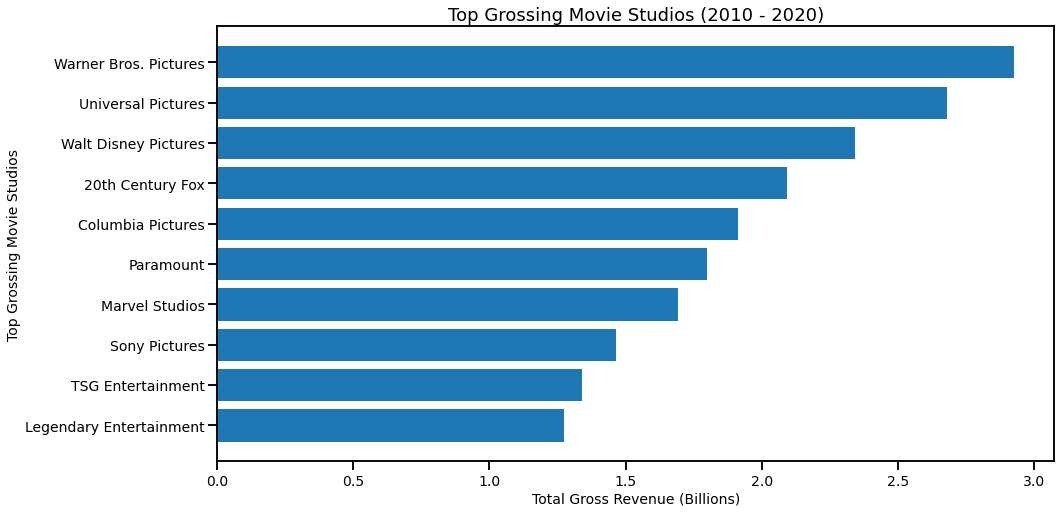

In [606]:
fig, ax = plt.subplots(figsize=(15,8))
y = revenue.sort_values(ascending=True)
x = y.index
ax.barh(x, y)
ax.set_title('Top Grossing Movie Studios (2010 - 2020)');
ax.set_xlabel('Total Gross Revenue (Billions)', fontsize=(14))
ax.set_ylabel('Top Grossing Movie Studios', fontsize=(14))
ax.set_xticklabels(labels=np.arange(0,3.5,.5), fontsize=(14))
ax.set_yticklabels(labels=x, fontsize=(14))


We also calculated the percentage of the market that each studio holds as a percentage of total gross revenue for all movies in the past 10 years. Unsuprisingly, the studios with the largest market share are also those with the largest total gross revenue.

Just these top 10 studios control over 20 percent of the box office movie market.

In [520]:
market_total = df.total_gross.sum()

In [521]:
studio_rank = df.groupby(['studio'])['total_gross'].sum().sort_values(ascending=False).reset_index()

In [522]:
studio_rank['market_share_pct'] = studio_rank.total_gross.apply(lambda x: (x/market_total)*100)

In [523]:
studio_rank.sort_values(by = 'market_share_pct', ascending = False).head(10)

,studio,total_gross,market_share_pct
0,Warner Bros. Pictures,29289833588,3.292285
1,Universal Pictures,26822103201,3.014903
2,Walt Disney Pictures,23442958342,2.635075
3,20th Century Fox,20923007528,2.351823
4,Columbia Pictures,19130138156,2.150298
5,Paramount,17998532998,2.023101
6,Marvel Studios,16912344272,1.901010
7,Sony Pictures,14653967127,1.647160
8,TSG Entertainment,13396253806,1.505788
9,Legendary Entertainment,12753602484,1.433552


In [524]:
studio_rank.shape

(2881, 3)

To further investigate gross revenue by studio, we looked into the distribution of gross revenue across all studios in the sample. We found that a large share of studios earn roughly 50,000,000 in revenue while studio like Disney, Universal and Warner Bros skew the dataset to the right raking in nearly 300,000,000,000 in revenue over this same period (2010 - 2020).

(0.0, 3000000000.0)

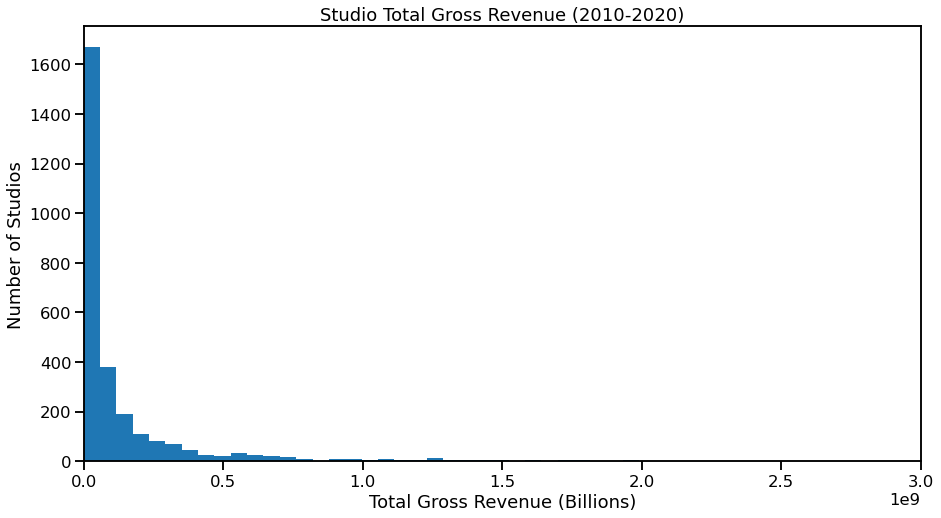

In [633]:
revenue_hist, ax = plt.subplots(figsize=(15,8))
a = studio_rank.total_gross
ax.hist(a, bins=500)
ax.set_title('Studio Total Gross Revenue (2010-2020)');
ax.set_xlabel('Total Gross Revenue (Billions)')
ax.set_ylabel('Number of Studios')
ax.set_xlim([0,3000000000])


We next decided to explore which studios have experienced the most growth in **profits** over the past 10 years. We do this by calculating the percent difference in profitability between each year in the 2010-2020 period. We then calculate the average percent change for the period for each studio.

In [662]:
# Group studio profitability by year and take the median profitability to feach movie produced in that year.
med_annprofit = df.groupby(['studio', 'year']).median().loc[ : , ['profitability']]

In [532]:
# We then pivoted the above df to display the median profitability by year for each studio.
profit_by_year = med_annprofit.sort_values(by=['profitability', 'year'], ascending=False).unstack()
profit_by_year

profitability            \
year                                                        2010      2011   
studio                                                                       
"Ali'n Productions"                                          NaN       NaN   
"Anarchist's Convention Films"                          0.123137       NaN   
"Centre du Cinéma et de l'Audiovisuel de la Féd...           NaN       NaN   
"Creative Skillset's Skills Investment Fund"                 NaN       NaN   
"Devil's Harvest Production"                                 NaN       NaN   
...                                                          ...       ...   
Ávila Films                                                  NaN       NaN   
Österreichisches Filminstitut                                NaN       NaN   
één                                                          NaN       NaN   
Česká televize                                               NaN  0.779811   
东阳坏猴子影视文化传播有限公司                                              NaN       NaN   

                                                                        \
year                                                    2012      2013   
studio                                                                   
"Ali'n Productions"                                      NaN       NaN   
"Anarchist's Convention Films"                           NaN       NaN   
"Centre du Cinéma et de l'Audiovisuel de la Féd...       NaN       NaN   
"Creative Skillset's Skills Investment Fund"             NaN       NaN   
"Devil's Harvest Production"                             NaN       NaN   
...                                                      ...       ...   
Ávila Films                                              NaN       NaN   
Österreichisches Filminstitut                            NaN       NaN   
één                                                      NaN       NaN   
Česká televize                                      0.268454  2.302668   
东阳坏猴子影视文化传播有限公司                                          NaN  2.684207   

                                                                              \
year                                                    2014 2015       2016   
studio                                                                         
"Ali'n Productions"                                      NaN  NaN        NaN   
"Anarchist's Convention Films"                           NaN  NaN        NaN   
"Centre du Cinéma et de l'Audiovisuel de la Féd...       NaN  NaN  89.586336   
"Creative Skillset's Skills Investment Fund"             NaN  NaN        NaN   
"Devil's Harvest Production"                             NaN  NaN        NaN   
...                                                      ...  ...        ...   
Ávila Films                                              NaN  NaN        NaN   
Österreichisches Filminstitut                            NaN  NaN        NaN   
één                                                      NaN  NaN        NaN   
Česká televize                                      1.035153  NaN        NaN   
东阳坏猴子影视文化传播有限公司                                          NaN  NaN        NaN   

                                                                        \
year                                                    2017      2018   
studio                                                                   
"Ali'n Productions"                                      NaN       NaN   
"Anarchist's Convention Films"                           NaN       NaN   
"Centre du Cinéma et de l'Audiovisuel de la Féd...       NaN       NaN   
"Creative Skillset's Skills Investment Fund"             NaN  0.905718   
"Devil's Harvest Production"                        0.028865       NaN   
...                                                      ...       ...   
Ávila Films                                         1.702618       NaN   
Österreichisches Filminstitut                            NaN

In [528]:
# Our next step is to calculate the percent change from previous year for each year and each studio.
# Test block prior to running a forloop
percent_change_from_prev_year_test = []
for year in range(2011, 2020):
        profit_1 = profit_by_year.loc[['Det Danske Filminstitut'],('profitability', year)]
        profit_0 = profit_by_year.loc[['Det Danske Filminstitut'],('profitability', year-1)]
        percent_change = round(((profit_1-profit_0)/profit_0), 2)
        percent_change_from_prev_year_test.append({'year': year, 'studio': list(percent_change.index)[0], 'percent_change': percent_change[0]})

In [529]:
# View the output from the for loop. it should be a list of dictionaries with the percent change in profitability
# from the previous year for just the Det Danske Filminstitut studio.

percent_change_from_prev_year_test

[{'year': 2011, 'studio': 'Det Danske Filminstitut', 'percent_change': nan},
 {'year': 2012, 'studio': 'Det Danske Filminstitut', 'percent_change': -0.99},
 {'year': 2013,
  'studio': 'Det Danske Filminstitut',
  'percent_change': 5046.53},
 {'year': 2014, 'studio': 'Det Danske Filminstitut', 'percent_change': nan},
 {'year': 2015, 'studio': 'Det Danske Filminstitut', 'percent_change': nan},
 {'year': 2016, 'studio': 'Det Danske Filminstitut', 'percent_change': nan},
 {'year': 2017, 'studio': 'Det Danske Filminstitut', 'percent_change': nan},
 {'year': 2018, 'studio': 'Det Danske Filminstitut', 'percent_change': nan},
 {'year': 2019, 'studio': 'Det Danske Filminstitut', 'percent_change': nan}]

In [536]:
# While the code above produce the percent change for each year for one particular studio, we would 
# like for that code to operate on all studios (indices) in the dataframe. To do this, we icorporate another
# for loop to iterte through each index.

percent_change_from_prev_year = []
for studio in profit_by_year.index:
    for year in range(2011, 2020):
        profit_1 = profit_by_year.loc[[studio],('profitability', year)]
        profit_0 = profit_by_year.loc[[studio],('profitability', year-1)]
        percent_change = round(((profit_1-profit_0)/profit_0)*100, 2)
        percent_change_from_prev_year.append({'year': year, 'studio': list(percent_change.index)[0], 'percent_change': percent_change[0]})
    

In [537]:
# Here we print the list which should now have the percent change in profitability from the previous year for each
# year between 2011 and 2019.

percent_change_from_prev_year

[{'year': 2011, 'studio': '"Ali\'n Productions"', 'percent_change': nan},
 {'year': 2012, 'studio': '"Ali\'n Productions"', 'percent_change': nan},
 {'year': 2013, 'studio': '"Ali\'n Productions"', 'percent_change': nan},
 {'year': 2014, 'studio': '"Ali\'n Productions"', 'percent_change': nan},
 {'year': 2015, 'studio': '"Ali\'n Productions"', 'percent_change': nan},
 {'year': 2016, 'studio': '"Ali\'n Productions"', 'percent_change': nan},
 {'year': 2017, 'studio': '"Ali\'n Productions"', 'percent_change': nan},
 {'year': 2018, 'studio': '"Ali\'n Productions"', 'percent_change': nan},
 {'year': 2019, 'studio': '"Ali\'n Productions"', 'percent_change': nan},
 {'year': 2011,
  'studio': '"Anarchist\'s Convention Films"',
  'percent_change': nan},
 {'year': 2012,
  'studio': '"Anarchist\'s Convention Films"',
  'percent_change': nan},
 {'year': 2013,
  'studio': '"Anarchist\'s Convention Films"',
  'percent_change': nan},
 {'year': 2014,
  'studio': '"Anarchist\'s Convention Films"',
  'p

We now insert this list of dictionaries into a data frame so that we may operate on it.

In [538]:
percent_change_df = pd.DataFrame(percent_change_from_prev_year)
percent_change_df.head(3)

,year,studio,percent_change
0,2011,"""Ali'n Productions""",NaN
1,2012,"""Ali'n Productions""",NaN
2,2013,"""Ali'n Productions""",NaN


We'll drop any rows where the chage in the profitability from the previous year is null. This happens because some studios do not produce a movie each year. As such, these rows will not be factored into our mean change in profitability calculation. 

In [539]:
percent_change_df.dropna(inplace=True)

In [626]:
profitability_rank = percent_change_df.groupby(['studio'])['percent_change'].mean().sort_values(ascending=False)

profitability_rank.head(10)

studio
Det Danske Filminstitut       252277.235000
UTV Motion Pictures            46443.420000
Red Hour                       11516.286667
Rabbit Bandini Productions      9965.330000
Arcadia Motion Pictures         7742.900000
Eskwad                          6727.790000
Dimension Films                 6487.425000
M6                              5969.870000
Handsomecharlie Films           5552.535000
Film Rites                      3660.240000
Name: percent_change, dtype: float64

We now round each percentage to 2 decimal places.

In [541]:
profitability_rank.percent_change = profitability_rank.percent_change.apply(lambda x: round(x, 2))

There are a few outliers in this data frame that are substantially skewing the mean growth in profitability from year-to-year. The first and largest mean percent growth from the previous year would indicate that, on average across all years between 2010 and 2019, this studio (Det Danske Filminsitut) experienced a 252,277% increase in profitability. This is likely due to the increase in profitability from a movie produced in 2012 that flopped to a the profitability from a 2013 movie that quintupled it's budget. 

This can difficult to understand and can make visualizations hard to interpret, so we'll first create a visualization that includes the outliers and then we'll then create a second that removes them. We'll do this by removing any values that are greater than 3 standard deviations from the mean.

In [542]:
profitability_rank.percent_change.describe()

count       430.000000
mean        971.858628
std       12397.461494
min         -99.850000
25%         -24.595000
50%          31.755000
75%         149.220000
max      252277.230000
Name: percent_change, dtype: float64

In [543]:
mean = profitability_rank.percent_change.mean()
std = profitability_rank.percent_change.std()

In [544]:
downward_cutoff = mean - 3*std

In [545]:
upward_cutoff = mean + 3*std

In [546]:
print(downward_cutoff)
print(upward_cutoff)

-36220.525854795575
38164.24311060953


In [547]:
# Removing the outliers.
profitability_rank_no_outliers = profitability_rank[(profitability_rank['percent_change']<upward_cutoff)&(profitability_rank['percent_change']>downward_cutoff)]


In [548]:
print(profitability_rank.shape)
print(profitability_rank_no_outliers.shape)

(430, 1)
(428, 1)


Now that we've removed the outliers in our sample, we'll first start by visualizing the top 10 studios with the largest mean percent change in profitability between 2010 and 2019 (inclusive of outliers). A small caveat here is that some movie studios produced only 2 movies, and so the mean percent change will be this value alone.

We'll then visualize our data using the profitability dataset excluding outliers.

In [556]:
profitability_rank_10 = profitability_rank.iloc[0:10, 0].sort_values()
profitability_rank_10

studio
Film Rites                      3660.24
Handsomecharlie Films           5552.53
M6                              5969.87
Dimension Films                 6487.42
Eskwad                          6727.79
Arcadia Motion Pictures         7742.90
Rabbit Bandini Productions      9965.33
Red Hour                       11516.29
UTV Motion Pictures            46443.42
Det Danske Filminstitut       252277.23
Name: percent_change, dtype: float64

[Text(0, 0, 'Film Rites'),
 Text(0, 0, 'Handsomecharlie Films'),
 Text(0, 0, 'M6'),
 Text(0, 0, 'Dimension Films'),
 Text(0, 0, 'Eskwad'),
 Text(0, 0, 'Arcadia Motion Pictures'),
 Text(0, 0, 'Rabbit Bandini Productions'),
 Text(0, 0, 'Red Hour'),
 Text(0, 0, 'UTV Motion Pictures'),
 Text(0, 0, 'Det Danske Filminstitut')]

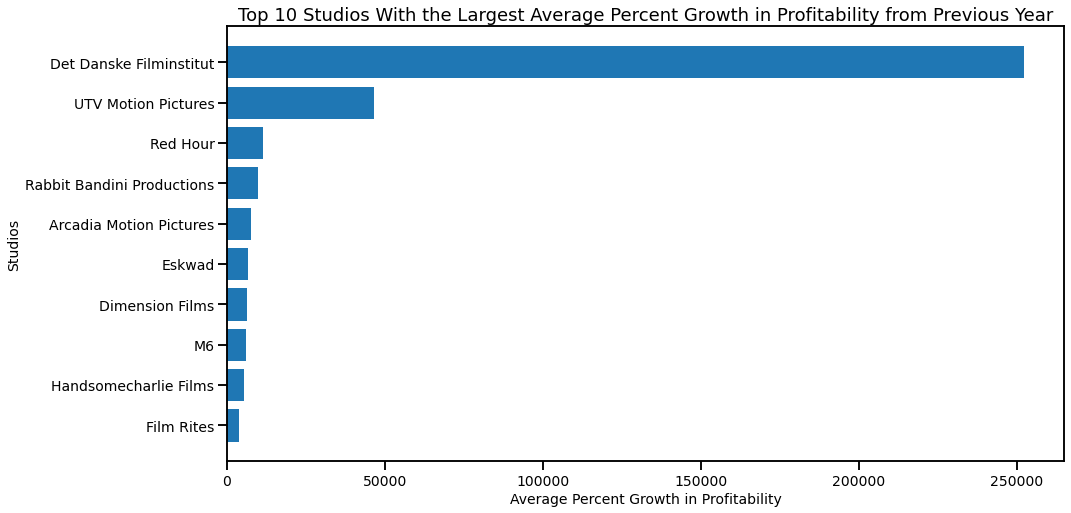

In [634]:
figure, ax = plt.subplots(figsize=(15,8))
ax.barh(profitability_rank_10.index, profitability_rank_10)
ax.set_ylabel('Studios', fontsize = 14) 
ax.set_xlabel('Average Percent Growth in Profitability', fontsize=14) 
ax.set_title('Top 10 Studios With the Largest Average Percent Growth in Profitability from Previous Year')
ax.set_xticklabels(labels=np.arange(0,300000,50000), fontsize=(14))
ax.set_yticklabels(labels=profitability_rank_10.index, fontsize=(14))

Now to visualize our data without outliers.

In [579]:
profitability_rank_10_no_outliers = profitability_rank_no_outliers.iloc[0:10, 0].sort_values()
profitability_rank_10_no_outliers

studio
IM Global                      3383.10
Rising Star                    3524.66
Film Rites                     3660.24
Handsomecharlie Films          5552.53
M6                             5969.87
Dimension Films                6487.42
Eskwad                         6727.79
Arcadia Motion Pictures        7742.90
Rabbit Bandini Productions     9965.33
Red Hour                      11516.29
Name: percent_change, dtype: float64

[Text(0, 0, 'IM Global'),
 Text(0, 0, 'Rising Star'),
 Text(0, 0, 'Film Rites'),
 Text(0, 0, 'Handsomecharlie Films'),
 Text(0, 0, 'M6'),
 Text(0, 0, 'Dimension Films'),
 Text(0, 0, 'Eskwad'),
 Text(0, 0, 'Arcadia Motion Pictures'),
 Text(0, 0, 'Rabbit Bandini Productions'),
 Text(0, 0, 'Red Hour')]

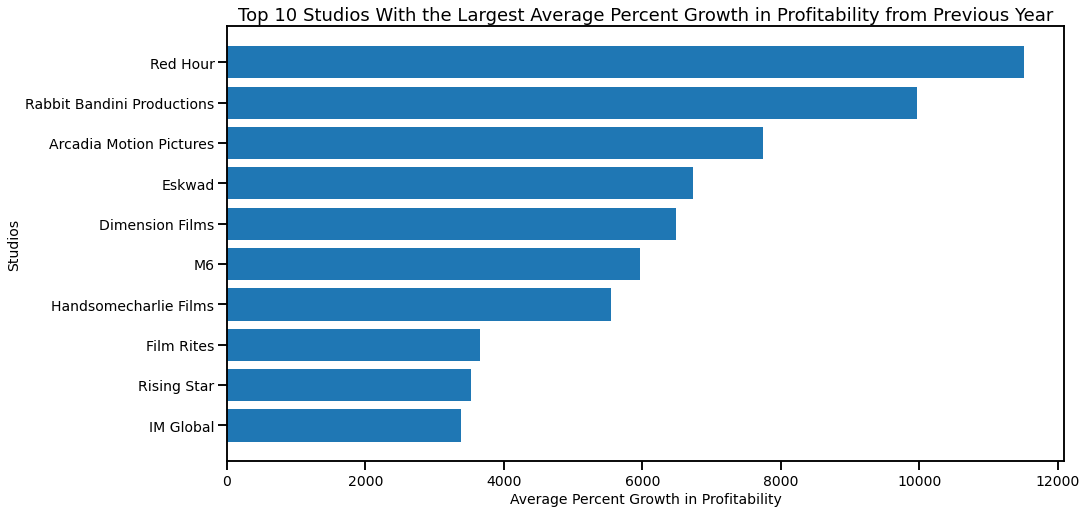

In [593]:
figure, ax = plt.subplots(figsize=(15,8))
ax.barh(profitability_rank_10_no_outliers.index, profitability_rank_10_no_outliers)
ax.set_ylabel('Studios', fontsize=(14)) 
ax.set_xlabel('Average Percent Growth in Profitability', fontsize=(14)) 
ax.set_title('Top 10 Studios With the Largest Average Percent Growth in Profitability from Previous Year')
ax.set_xticklabels(labels=np.arange(0,14000,2000), fontsize=(14))
ax.set_yticklabels(labels=profitability_rank_10_no_outliers.index, fontsize=(14))

#### We can now look into what may be contributing to these studios' success in profitability growth from previous years.

For this descriptive endeavor, we'll revert back to our original data frame, df. We'll begin by looking at those studios in the top 5 of our "emerging studios" list.

In [560]:
df.head()

,Unnamed: 0,year,imdb_rating,imdb_numvotes,tmdb_id,imdb_id,title,genre,studio,tmdb_rating,tmdb_num_votes,production_budget,domestic_gross,total_gross,profitability
0,0,2010,8.3,65304,44639.0,tt1645089,Inside Job,['Documentary'],Sony Pictures,7.7,586.0,2000000,4311834.0,7799257,3.899629
1,1,2010,6.4,971,59015.0,tt1646127,Lights Out,"['Drama', 'Mystery', 'Thriller']",Diaphana Films,6.2,32.0,5000000,67268835.0,148806510,29.761302
1,1,2010,6.4,971,59015.0,tt1646127,Lights Out,"['Drama', 'Mystery', 'Thriller']",Région Ile-de-France,6.2,32.0,5000000,67268835.0,148806510,29.761302
1,1,2010,6.4,971,59015.0,tt1646127,Lights Out,"['Drama', 'Mystery', 'Thriller']",CNC,6.2,32.0,5000000,67268835.0,148806510,29.761302
1,1,2010,6.4,971,59015.0,tt1646127,Lights Out,"['Drama', 'Mystery', 'Thriller']",La Banque Postale Image 3,6.2,32.0,5000000,67268835.0,148806510,29.761302


We'll start by looking at Det Danske Filminstitut.

What we can see in the below data frame is that the reason Det Danske Filminstitut tops the list for the largest average percent growth across the decade is because the increase in profitability from *Eddie: The Sleepwalking Cannibal* to *Ida* was astronomical in comparison to the differences between years. For this reason, we feel that average percent change across the period may not be the most accurate representation of a studio's success as we calculated it here. 

In [575]:
detdanske = df[df['studio']=='Det Danske Filminstitut']
detdanske

,Unnamed: 0,year,imdb_rating,imdb_numvotes,tmdb_id,imdb_id,title,genre,studio,tmdb_rating,tmdb_num_votes,production_budget,domestic_gross,total_gross,profitability
447,447,2011,6.6,2941,86987.0,tt1809231,Jackpot,"['Action', 'Comedy', 'Crime']",Det Danske Filminstitut,6.0,22.0,400000,44452.0,44452,0.111130
733,733,2012,5.6,1364,100275.0,tt1480658,Eddie: The Sleepwalking Cannibal,"['Horror', 'Comedy']",Det Danske Filminstitut,6.2,38.0,1400000,1632.0,1632,0.001166
748,748,2013,7.4,46819,209274.0,tt2718492,Ida,['Drama'],Det Danske Filminstitut,7.3,597.0,2600000,3827060.0,15298355,5.883983
1844,1844,2017,7.0,20994,397538.0,tt5727282,Borg vs McEnroe,"['Drama', 'History']",Det Danske Filminstitut,7.0,801.0,7500000,231346.0,3257922,0.434390
1902,1902,2017,7.2,44239,401246.0,tt4995790,The Square,['Drama'],Det Danske Filminstitut,6.8,821.0,1900000,406216.0,740932,0.389964


Similarly, for UTV Motion Pictures, the percent change in profitability from *Phantom* to *Dangal* seems to be skewing the average percent change in profitability.

In [629]:
UTV = df[df['studio']=='UTV Motion Pictures']
UTV

,Unnamed: 0,year,imdb_rating,imdb_numvotes,tmdb_id,imdb_id,title,genre,studio,tmdb_rating,tmdb_num_votes,production_budget,domestic_gross,total_gross,profitability
803,803,2013,7.8,42618,191714.0,tt2350496,The Lunchbox,"['Drama', 'Romance']",UTV Motion Pictures,7.3,433.0,1700000,4231500.0,12231500,7.195000
882,882,2013,7.1,33971,185008.0,tt2178470,Yeh Jawaani Hai Deewani,"['Comedy', 'Romance']",UTV Motion Pictures,7.3,164.0,8300000,3827466.0,50827466,6.123791
1403,1403,2015,5.8,7739,353879.0,tt3469244,Phantom,"['Thriller', 'Action']",UTV Motion Pictures,5.5,31.0,18000000,1034589.0,1199510,0.066639
1532,1532,2016,8.5,123638,360814.0,tt5074352,Dangal,"['Drama', 'Action']",UTV Motion Pictures,8.1,482.0,9500000,12391761.0,294654618,31.016276


In [630]:
red_hour = df[df['studio']=='Red Hour']
red_hour

,Unnamed: 0,year,imdb_rating,imdb_numvotes,tmdb_id,imdb_id,title,genre,studio,tmdb_rating,tmdb_num_votes,production_budget,domestic_gross,total_gross,profitability
86,86,2010,7.3,79810,49020.0,tt1440292,Submarine,"['Drama', 'Comedy', 'Romance']",Red Hour,7.4,945.0,1900000,467602.0,4581937,2.411546
402,402,2011,6.2,39522,73937.0,tt1053810,The Big Year,['Comedy'],Red Hour,5.8,493.0,41000000,7204138.0,7684524,0.187427
722,722,2012,5.2,8838,73935.0,tt1545106,Vamps,"['Comedy', 'Romance', 'Horror']",Red Hour,5.0,162.0,16000000,3361.0,94812,0.005926
952,952,2013,7.3,275300,116745.0,tt0359950,The Secret Life of Walter Mitty,"['Adventure', 'Comedy', 'Drama', 'Fantasy']",Red Hour,7.1,5658.0,91000000,58236838.0,187861183,2.064409
1678,1678,2016,4.7,59914,329833.0,tt1608290,Zoolander 2,['Comedy'],Red Hour,4.8,1610.0,50000000,28848693.0,55348693,1.106974
1744,1744,2016,6.2,89628,356305.0,tt4501244,Why Him?,['Comedy'],Red Hour,6.3,3041.0,38000000,60323786.0,117425156,3.090136


In [631]:
rabbit = df[df['studio']=='Rabbit Bandini Productions']
rabbit

,Unnamed: 0,year,imdb_rating,imdb_numvotes,tmdb_id,imdb_id,title,genre,studio,tmdb_rating,tmdb_num_votes,production_budget,domestic_gross,total_gross,profitability
675,675,2012,5.3,126504,122081.0,tt2101441,Spring Breakers,"['Drama', 'Crime']",Rabbit Bandini Productions,5.1,2967.0,5000000,14124286.0,31149251,6.229850
912,912,2013,6.2,25402,192132.0,tt2479800,Palo Alto,['Drama'],Rabbit Bandini Productions,6.3,613.0,1000000,767732.0,1156309,1.156309
1740,1740,2016,6.1,3189,337844.0,tt4411618,In Dubious Battle,['Drama'],Rabbit Bandini Productions,5.8,86.0,15000000,0.0,214182,0.014279
1974,1974,2017,7.4,111737,371638.0,tt3521126,The Disaster Artist,"['Comedy', 'Drama']",Rabbit Bandini Productions,7.2,2475.0,10000000,21120616.0,28717667,2.871767


In [632]:
arcadia = df[df['studio']=='Arcadia Motion Pictures']
arcadia

,Unnamed: 0,year,imdb_rating,imdb_numvotes,tmdb_id,imdb_id,title,genre,studio,tmdb_rating,tmdb_num_votes,production_budget,domestic_gross,total_gross,profitability
368,368,2011,6.6,8553,68818.0,tt1629705,Blackthorn,"['Adventure', 'Action', 'Western']",Arcadia Motion Pictures,6.6,155.0,4500000,200558.0,1217307,0.270513
1115,1115,2014,5.3,3001,251321.0,tt2494384,Aloft,['Drama'],Arcadia Motion Pictures,5.6,82.0,8000000,53086.0,237688,0.029711
1305,1305,2015,6.1,624,321497.0,tt2698966,The Debt,"['Mystery', 'Drama', 'Thriller']",Arcadia Motion Pictures,5.8,19.0,20000000,31177548.0,46604054,2.330203


The rest of the studios shown above have smaller jumps in profitability making their percent changes from the prevous year smaller and more consistent across years. In this vein, we feel that consistency in profitability is much better than highly variable profitability and a better metric of consistent variability will be average profitability for all movies in the time period.

#### Below we conduct a profitability analysis ranking the top 10 most profitable studios over the past 10 years.

In [635]:
profitability_10 = df.groupby(['studio'])['profitability'].mean().sort_values(ascending=False).iloc[0:10]
profitability_10

studio
Tremendum Pictures                     416.564740
Management 360                         140.728961
Prototype                              101.759490
Filmski kolektiv                        89.586336
istos film                              89.586336
A & D Studios                           89.586336
Sekvenca                                89.586336
Versus Production                       89.586336
Film and Music Entertainment (F&ME)     89.586336
Prime Time                              89.586336
Name: profitability, dtype: float64

[Text(0, 0, 'Filmski kolektiv'),
 Text(0, 0, 'istos film'),
 Text(0, 0, 'A & D Studios'),
 Text(0, 0, 'Sekvenca'),
 Text(0, 0, 'Versus Production'),
 Text(0, 0, 'Film and Music Entertainment (F&ME)'),
 Text(0, 0, 'Prime Time'),
 Text(0, 0, 'Prototype'),
 Text(0, 0, 'Management 360'),
 Text(0, 0, 'Tremendum Pictures')]

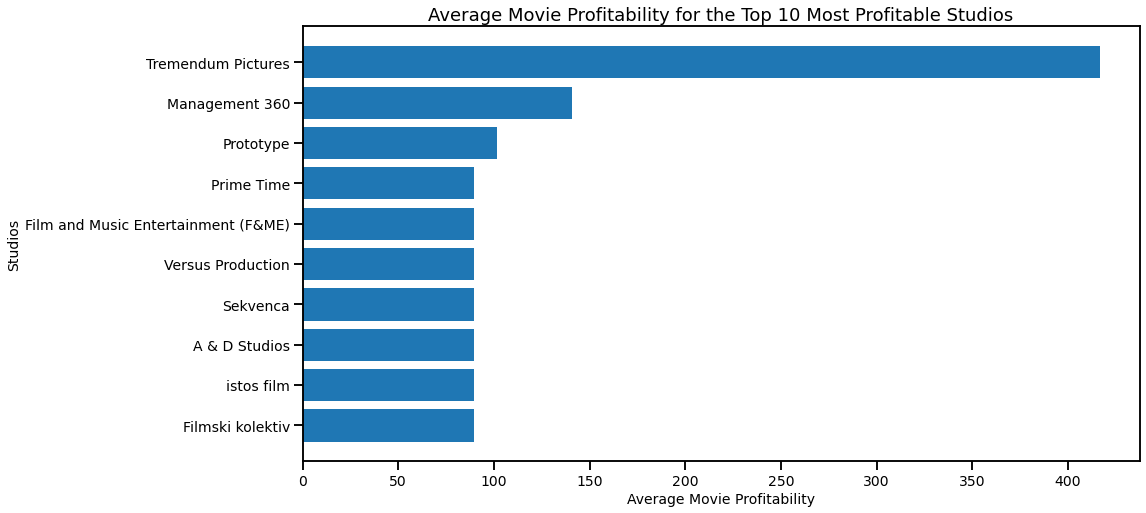

In [636]:
figure, ax = plt.subplots(figsize=(15,8))
ax.barh(profitability_10.sort_values().index, profitability_10.sort_values())
ax.set_ylabel('Studios', fontsize=(14)) 
ax.set_xlabel('Average Movie Profitability', fontsize=(14)) 
ax.set_title('Average Movie Profitability for the Top 10 Most Profitable Studios')
ax.set_xticklabels(labels=np.arange(0,450,50), fontsize=(14))
ax.set_yticklabels(labels=profitability_10.sort_values().index, fontsize=(14))

We'll now explore what makes these studios successful or profitable.

We can see here that Tremendum Pictures tops the list for most profitable studio. This is due entirely to their success with *The Gallows*, their only movie in our dataset. This move made 416.5 times their production budget in gross revenue. That's a successful movie!

The only odd thing to note is that the movie did not receive great user reviews. This could be suggestive that movie genres rather than movie reviews may be more closely related to movie profitability. 

In [637]:
tremendum = df[df['studio']=='Tremendum Pictures']
tremendum

,Unnamed: 0,year,imdb_rating,imdb_numvotes,tmdb_id,imdb_id,title,genre,studio,tmdb_rating,tmdb_num_votes,production_budget,domestic_gross,total_gross,profitability
1522,1522,2015,4.2,17763,299245.0,tt2309260,The Gallows,"['Horror', 'Thriller']",Tremendum Pictures,4.8,694.0,100000,22764410.0,41656474,416.56474


Similarly, Management 360, a co-production studio on *The Gallows*, had great success in the profitability of their movies. While *The Gallows* substantially skews their profitability, their other movies also fare well, raking in more than their budget for each.

In [638]:
mgmt = df[df['studio']=='Management 360']
mgmt

,Unnamed: 0,year,imdb_rating,imdb_numvotes,tmdb_id,imdb_id,title,genre,studio,tmdb_rating,tmdb_num_votes,production_budget,domestic_gross,total_gross,profitability
725,725,2012,6.3,38667,82696.0,tt1535438,Hope Springs,"['Drama', 'Comedy', 'Romance']",Management 360,6.1,519.0,30000000,63536011.0,133085295,4.436177
1459,1459,2015,7.2,138668,321697.0,tt2080374,Steve Jobs,"['Drama', 'History']",Management 360,6.8,3069.0,30000000,17766658.0,35579007,1.185967
1522,1522,2015,4.2,17763,299245.0,tt2309260,The Gallows,"['Horror', 'Thriller']",Management 360,4.8,694.0,100000,22764410.0,41656474,416.564740


Prototype Studios also had just one movie, *The Devil Inside* that also did not receive great reviews. The profitability of this movie, however, was rather high, raking in 101 times their production budget.

In [639]:
prototype = df[df['studio']=='Prototype']
prototype

,Unnamed: 0,year,imdb_rating,imdb_numvotes,tmdb_id,imdb_id,title,genre,studio,tmdb_rating,tmdb_num_votes,production_budget,domestic_gross,total_gross,profitability
727,727,2012,4.2,33522,76487.0,tt1560985,The Devil Inside,"['Thriller', 'Horror']",Prototype,4.7,520.0,1000000,53262945.0,101759490,101.75949


Below, Prime Time is another example of a studio that has a high profitability index given their production of just one movie in our dataset. Their movie, *Home*, brought in more than 89 times their production budget.

In [641]:
primetime = df[df['studio']=='Prime Time']
primetime

,Unnamed: 0,year,imdb_rating,imdb_numvotes,tmdb_id,imdb_id,title,genre,studio,tmdb_rating,tmdb_num_votes,production_budget,domestic_gross,total_gross,profitability
1618,1618,2016,7.2,811,411037.0,tt4047846,Home,['Drama'],Prime Time,8.0,14.0,500000,15433.0,44793168,89.586336


Lastly, coming in at the fifth spot for most profitable is Film and Music Entertainment - a co_production studio on the film *Home*.

In [642]:
fme = df[df['studio']=='Film and Music Entertainment (F&ME)']
fme

,Unnamed: 0,year,imdb_rating,imdb_numvotes,tmdb_id,imdb_id,title,genre,studio,tmdb_rating,tmdb_num_votes,production_budget,domestic_gross,total_gross,profitability
2042,2042,2018,8.4,32,510364.0,tt8601408,Home,['Drama'],Film and Music Entertainment (F&ME),0.0,0.0,500000,15433.0,44793168,89.586336


### Summary of Profitability Analysis

In the above anlayses, we looked at both the average profitability across all years between 2010 and 2020 and the average percent change in profitability across the same time period. It's hard to say which method is a better measure of studio success given the low number of movies produced by these studios. 

The limitations of the profitability analysis are that some studios are listed as the most profitable studios based on their production of just one movie. In future analyses, we'd like to restrict our analyses to only those studios that have produced at least 10 movies in the given time period.

The limitations of the percent change in profitability analysis were that the ranking was highly susceptible to outliers in the instance where there was a movie that severely under-performed in a given year and then a movie that was even incrementally better in the following year. These anomalies made it very difficult to draw meaningful conclusions from this analysis. 